In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('libraries importes')

libraries importes


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/18_june_DS/master/insurance/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# finding duplicate records
print("duplicate record >>>>",df.duplicated().sum())

duplicate record >>>> 1


In [6]:
# checking messing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# to see all the columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
# the change the column name 
df.columns = ['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges']

In [10]:
df.head()

age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [11]:
# to count the genders unique values
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [12]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [13]:
#to find minimum charges
df['charges'].min()

1121.8739

In [14]:
# to find maximum charges
df['charges'].max()

63770.42801

In [15]:
# to find the average charge
df['charges'].mean()

13270.422265141257

In [16]:
# to seprate the male data to female data
female = df[df['gender'] == 'female']
male = df[df['gender'] == 'male']

In [17]:
print("Female charges >>",female['charges'].mean())
print("Male charges >>",male['charges'].mean())

Female charges >> 12569.578843835347
Male charges >> 13956.751177721893


In [18]:
female['smoker'].value_counts()

smoker
no     547
yes    115
Name: count, dtype: int64

In [19]:
male['smoker'].value_counts()

smoker
no     517
yes    159
Name: count, dtype: int64

In [73]:
print("Total Girls : ", female.shape[0]) 
print("Total Boys : ", male.shape[0] )

Total Girls :  662
Total Boys :  676


In [20]:
female_charge = female[female['charges'] <= female['charges'].mean()]
female_charge

age  gender    bmi  children smoker     region      charges
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
13     56  female  39.82         0     no  southeast  11090.71780
16     52  female  30.78         1     no  northeast  10797.33620
...   ...     ...    ...       ...    ...        ...          ...
1331   23  female  33.40         0     no  southwest  10795.93733
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[441 rows x 7 columns]

In [21]:
female_charge.shape[0]

441

In [22]:
female_charge['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [74]:
male_charge = male[male['charges'] <= male['charges'].mean()]
male_charge.head()

age gender    bmi  children smoker     region    charges
1    18   male  33.77         1     no  southeast  1725.5523
2    28   male  33.00         3     no  southeast  4449.4620
4    32   male  28.88         0     no  northwest  3866.8552
8    37   male  29.83         2     no  northeast  6406.4107
10   25   male  26.22         0     no  northeast  2721.3208

In [75]:
print("Total Mail : ",male_charge.shape[0])

Total Mail :  466


In [25]:
male_charge['smoker'].value_counts()

smoker
no     464
yes      2
Name: count, dtype: int64

In [76]:
# quiz min max mean()
# region [southwest,southeast,northwest,]
df.head()

age  gender     bmi  children  smoker     region      charges  \
0   19       0  27.900         0       1  southwest  16884.92400   
1   18       1  33.770         1       0  southeast   1725.55230   
2   28       1  33.000         3       0  southeast   4449.46200   
3   33       1  22.705         0       0  northwest  21984.47061   
4   32       1  28.880         0       0  northwest   3866.85520   

   health_category  
0                3  
1                4  
2                4  
3                2  
4                3

## male candidate region charges

In [27]:
# male candidate region charges
male_region = male.groupby('region')

In [28]:
male_region[['charges']].max()

charges
region                
northeast  48549.17835
northwest  60021.39897
southeast  62592.87309
southwest  52590.82939

In [29]:
male_region[['charges']].min()

charges
region              
northeast  1694.7964
northwest  1621.3402
southeast  1121.8739
southwest  1241.5650

In [30]:
male_region[['charges']].mean()

charges
region                 
northeast  13854.005374
northwest  12354.119575
southeast  15879.617173
southwest  13412.883576

In [31]:
male_region['charges'].agg(min_charges="min",max_charges="max",average_charges="mean")

min_charges  max_charges  average_charges
region                                              
northeast    1694.7964  48549.17835     13854.005374
northwest    1621.3402  60021.39897     12354.119575
southeast    1121.8739  62592.87309     15879.617173
southwest    1241.5650  52590.82939     13412.883576

## female candidate region charges


In [32]:
female_region = female.groupby('region')

In [78]:
female_group_analysis = female_region['charges'].agg(min_charges="min",max_charges="max",average_charges="mean")
female_group_analysis

min_charges  max_charges  average_charges
region                                              
northeast   2196.47320  58571.07448     12953.203151
northwest   2117.33885  55135.40209     12479.870397
southeast   1607.51010  63770.42801     13499.669243
southwest   1727.78500  48824.45000     11274.411264

In [80]:
female_regions = list(female_group_analysis['average_charges'].index)
female_regions

['northeast', 'northwest', 'southeast', 'southwest']

In [82]:
average_charges = list(female_group_analysis['average_charges'].values)
average_charges

[12953.203151298138,
 12479.870396585366,
 13499.669242914284,
 11274.411263641974]

In [85]:
female_group_analysis

min_charges  max_charges  average_charges
region                                              
northeast   2196.47320  58571.07448     12953.203151
northwest   2117.33885  55135.40209     12479.870397
southeast   1607.51010  63770.42801     13499.669243
southwest   1727.78500  48824.45000     11274.411264

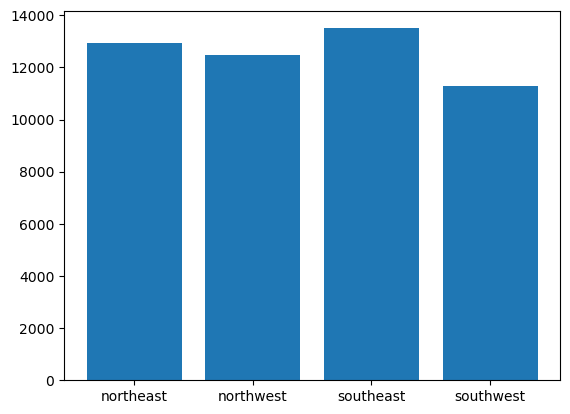

In [87]:
plt.bar(female_regions,average_charges)
plt.show()

# Assignment
## feature engineering  
 < 18.5   ==> underweight 
 18.5 to 24.  ==> HealthyWeight 
 25.0 to 29.9  ==> overweight
 30 ===>  'obese'

### underweight , HealthyWeight , overweight

# new_column = health_category

In [39]:
# add new clumn health category 

In [40]:
ls=list(df['bmi'])

In [41]:
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')

In [42]:
df['health_category'] =label

In [43]:
df.head()

age  gender     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

  health_category  
0      Overweight  
1           obese  
2           obese  
3   HealthyWeight  
4      Overweight

In [44]:
# gender ==> onehot encode
gender_dict ={'female':0,'male':1}

smoker_dict = {'yes':1,'no':0}


df['gender']=df['gender'].map(gender_dict)

df['smoker']=df['smoker'].map(smoker_dict)

In [45]:
df.head()

age  gender     bmi  children  smoker     region      charges  \
0   19       0  27.900         0       1  southwest  16884.92400   
1   18       1  33.770         1       0  southeast   1725.55230   
2   28       1  33.000         3       0  southeast   4449.46200   
3   33       1  22.705         0       0  northwest  21984.47061   
4   32       1  28.880         0       0  northwest   3866.85520   

  health_category  
0      Overweight  
1           obese  
2           obese  
3   HealthyWeight  
4      Overweight

In [46]:
df.health_category.value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [47]:
list(df.health_category.value_counts().keys())

['obese', 'Overweight', 'HealthyWeight', 'Underweight']

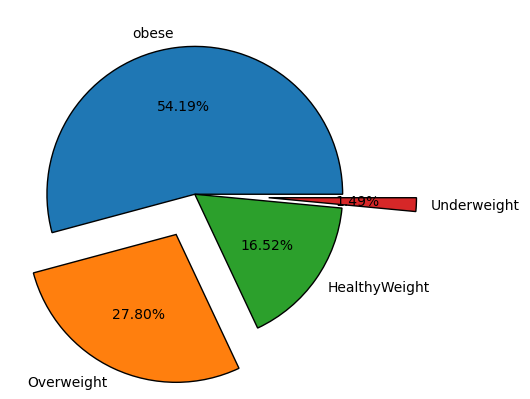

In [48]:
helth_cat = list(df.health_category.value_counts().keys())
helth_val = list(df.health_category.value_counts().values)
exp=[0,0.3,0,0.5]
plt.pie(helth_val,labels=helth_cat,autopct = '%1.2f%%',wedgeprops = {'ec':'k'},explode=exp)
plt.show()

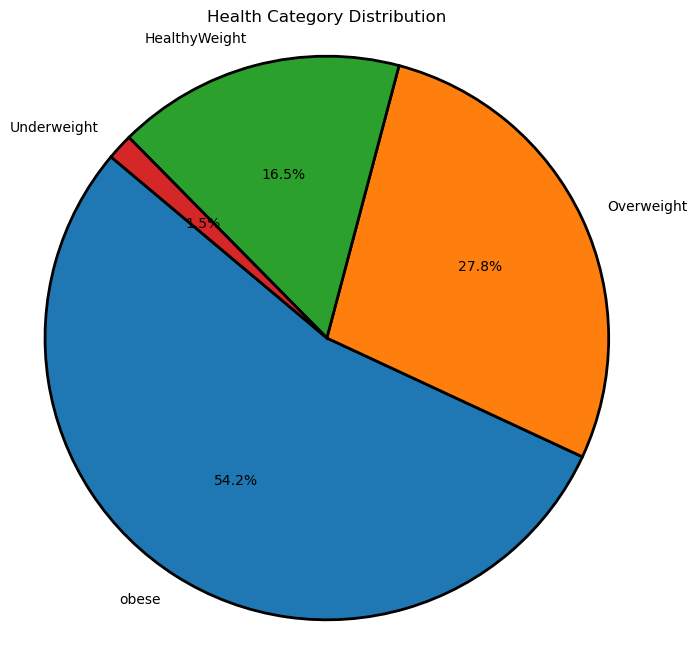

In [49]:
value_counts = df['health_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,wedgeprops={'ec':'k','lw':2})
plt.title('Health Category Distribution')
plt.axis('equal')
plt.show()

In [50]:
df['health_category'].value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [51]:
health_category_dict ={'Underweight':1,'HealthyWeight':2,'Overweight':3,'obese':4}
df['health_category'] = df['health_category'].map(health_category_dict)

In [88]:
df.head()

age  gender     bmi  children  smoker     region      charges  \
0   19       0  27.900         0       1  southwest  16884.92400   
1   18       1  33.770         1       0  southeast   1725.55230   
2   28       1  33.000         3       0  southeast   4449.46200   
3   33       1  22.705         0       0  northwest  21984.47061   
4   32       1  28.880         0       0  northwest   3866.85520   

   health_category  
0                3  
1                4  
2                4  
3                2  
4                3

In [53]:
[df['region']]

[0       southwest
 1       southeast
 2       southeast
 3       northwest
 4       northwest
           ...    
 1333    northwest
 1334    northeast
 1335    southeast
 1336    southwest
 1337    northwest
 Name: region, Length: 1338, dtype: object]

In [89]:
#region
final_data = pd.get_dummies(df).astype(int)
final_data.head()

age  gender  bmi  children  smoker  charges  health_category  \
0   19       0   27         0       1    16884                3   
1   18       1   33         1       0     1725                4   
2   28       1   33         3       0     4449                4   
3   33       1   22         0       0    21984                2   
4   32       1   28         0       0     3866                3   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0

In [55]:
### x and y split
x = final_data.drop('charges',axis='columns')

y = final_data[['charges']]

In [56]:
### training and testing split test_size = 0.2
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) # test size 20% training size 80%

In [57]:
### Model Training
## Regression 
# 1.linearRegresion
# 2. DecisonTree
# 3. RandomForest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [58]:
## object creation
## Hyper parameter turning --> to obtained higest accuracy
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdmfr = RandomForestRegressor()
# i ma going with default perimeters

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
x_train.isnull().sum()

age                 0
gender              0
bmi                 0
children            0
smoker              0
health_category     0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [61]:
y_train.isnull().sum()

charges    0
dtype: int64

In [62]:
## train model
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdmfr.fit(x_train,y_train)
print("you have trained your all algorithms")

you have trained your all algorithms


In [63]:
## Model Evaluation
print("Training Score by Linear",lnr.score(x_train,y_train)*100)
print("Training Score by Decision tree",dtr.score(x_train,y_train)*100)
print("Training Score by Random Forest",rdmfr.score(x_train,y_train)*100)

print()

print("Testing Score by Linear",lnr.score(x_test,y_test)*100)
print("Testing Score by Decision tree",dtr.score(x_test,y_test)*100)
print("Testing Score by Random Forest",rdmfr.score(x_test,y_test)*100)


Training Score by Linear 74.22185348225631
Training Score by Decision tree 99.71255937673995
Training Score by Random Forest 97.28616282711609

Testing Score by Linear 79.52435898015648
Testing Score by Decision tree 71.65280371960793
Testing Score by Random Forest 89.84232546768513


In [64]:
### predection
predection_linear = lnr.predict(x_test)
predection_Decesiontree =dtr.predict(x_test)
predection_randomforest =rdmfr.predict(x_test)

In [90]:
comparision_df = pd.concat([x_test,y_test],axis=1)
comparision_df.head()

age  gender  bmi  children  smoker  health_category  region_northeast  \
542    63       0   36         0       0                4                 0   
1059   32       1   33         1       0                4                 0   
635    64       1   38         0       0                4                 1   
744    50       1   26         0       0                3                 0   
261    20       0   26         1       1                3                 0   

      region_northwest  region_southeast  region_southwest  charges  
542                  0                 1                 0    13887  
1059                 1                 0                 0     4462  
635                  0                 0                 0    14410  
744                  1                 0                 0     8827  
261                  0                 1                 0    17085

In [66]:
comparision_df['linear_predection']=predection_linear
comparision_df['Decisiontree_predection']=predection_Decesiontree
comparision_df['randomforest_predection']=predection_randomforest


In [91]:
comparision_df.head()

age  gender  bmi  children  smoker  health_category  region_northeast  \
542    63       0   36         0       0                4                 0   
1059   32       1   33         1       0                4                 0   
635    64       1   38         0       0                4                 1   
744    50       1   26         0       0                3                 0   
261    20       0   26         1       1                3                 0   

      region_northwest  region_southeast  region_southwest  charges  
542                  0                 1                 0    13887  
1059                 1                 0                 0     4462  
635                  0                 0                 0    14410  
744                  1                 0                 0     8827  
261                  0                 1                 0    17085

In [113]:
comparision_df.to_csv('prediction.csv',index=False)

In [114]:
import joblib,os 

In [118]:
# saving the models
os.makedirs('models',exist_ok = True)
joblib.dump(lnr,'./models/linear_model.lb')
joblib.dump(dtr,'./models/Decisiontree_model.lb')
joblib.dump(rdmfr,'./models/randomforest_model.lb')

['./models/randomforest_model.lb']

# Thank you 😊

In [69]:
# to improve/increase the accuresy/performance of the model or algorithm
# 1 : change your data pre processing techinques
# 2 : Get a sufficient amount of data
# 3 : linear,Decission tree,RandomForest ==> change your algorithms
# 4 : Default perimeters --> perform hyper perimeter turining 

## Assignment
### remove BIM and also regin field to label encoding


In [93]:
final_data2 = df.drop(['bmi'],axis='columns')
final_data2
region_dict ={'southeast':1,'southwest':2,'northeast':3,'northwest':4}
final_data2['region'] = final_data2['region'].map(region_dict)

In [95]:
final_data2.head()

age  gender  children  smoker  region      charges  health_category
0   19       0         0       1       2  16884.92400                3
1   18       1         1       0       1   1725.55230                4
2   28       1         3       0       1   4449.46200                4
3   33       1         0       0       4  21984.47061                2
4   32       1         0       0       4   3866.85520                3

In [97]:
# x and y split
x = final_data2.drop('charges',axis='columns')

y = final_data2[['charges']]

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [100]:
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdmfr = RandomForestRegressor()

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
x_train.isnull().sum()

age                0
gender             0
children           0
smoker             0
region             0
health_category    0
dtype: int64

In [103]:
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdmfr.fit(x_train,y_train)
print("you have trained your all algorithms")

you have trained your all algorithms


In [104]:
print("Training Score by Linear",lnr.score(x_train,y_train)*100)
print("Training Score by Decision tree",dtr.score(x_train,y_train)*100)
print("Training Score by Random Forest",rdmfr.score(x_train,y_train)*100)

print()

print("Testing Score by Linear",lnr.score(x_test,y_test)*100)
print("Testing Score by Decision tree",dtr.score(x_test,y_test)*100)
print("Testing Score by Random Forest",rdmfr.score(x_test,y_test)*100)

Training Score by Linear 74.84102998166371
Training Score by Decision tree 98.40997303696595
Training Score by Random Forest 96.40268727260057

Testing Score by Linear 75.65074805706784
Testing Score by Decision tree 67.80308514221167
Testing Score by Random Forest 82.13703229005557


In [105]:
predection_linear = lnr.predict(x_test)
predection_Decesiontree =dtr.predict(x_test)
predection_randomforest =rdmfr.predict(x_test)

In [107]:
comparision_df = pd.concat([x_test,y_test],axis=1)
comparision_df.head()

age  gender  children  smoker  region  health_category      charges
431    29       0         2       0       4                2   4906.40965
947    37       1         1       1       3                4  39047.28500
1002   24       1         0       0       2                3   1972.95000
166    20       0         5       0       2                4   4830.63000
191    36       0         0       0       2                3   4883.86600

In [108]:
comparision_df['linear_predection']=predection_linear
comparision_df['Decisiontree_predection']=predection_Decesiontree
comparision_df['randomforest_predection']=predection_randomforest

In [110]:
comparision_df.head()

age  gender  children  smoker  region  health_category      charges  \
431    29       0         2       0       4                2   4906.40965   
947    37       1         1       1       3                4  39047.28500   
1002   24       1         0       0       2                3   1972.95000   
166    20       0         5       0       2                4   4830.63000   
191    36       0         0       0       2                3   4883.86600   

      linear_predection  Decisiontree_predection  randomforest_predection  
431         3189.160334              18157.87600              9292.576162  
947        33085.100666              39125.33225             39714.049326  
1002        2834.102017               1826.84300              7550.560488  
166         6693.479008               4687.79700              4624.081001  
191         6144.992793               4889.03680              5183.738758